# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Araynah Dover.</p>
### <p style="text-align: right;"> &#9989; doverara</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [2]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    # Complete the remaining continents
    'South America': {
        'Venezuela': ['Central America', 'Peru', 'Brazil'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Argentina': ['Peru', 'Brazil']
    },
    'Europe': {
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Great Britain': ['Iceland', 'Scandinavia', 'Northern Europe', 'Western Europe'],
        'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Russia'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'],
        'Northern Europe': ['Great Britain', 'Scandinavia', 'Western Europe', 'Southern Europe', 'Russia'],
        'Southern Europe': ['Western Europe', 'Northern Europe', 'Russia', 'Middle East', 'Egypt', 'North Africa'],
        'Russia': ['Scandinavia', 'Northern Europe', 'Southern Europe', 'Middle East', 'Ural', 'Afghanistan'],
    },
    'Africa': {
        'North Africa': ['Brazil', 'Western Europe', 'Egypt', 'East Africa', 'Congo', 'Southern Europe'],
        'Egypt': ['North Africa', 'Southern Europe', 'Middle East', 'East Africa'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'South Africa', 'Madagascar', 'Middle East'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['South Africa', 'East Africa']
    },
    'Asia': {
        'Middle East': ['Egypt', 'Southern Europe', 'Russia', 'Afghanistan', 'India', 'East Africa'],
        'Afghanistan': ['Russia', 'Ural', 'China', 'India', 'Middle East'],
        'Ural': ['Russia', 'Siberia', 'China', 'Afghanistan'],
        'China': ['Ural', 'Siberia', 'Mongolia', 'Southeast Asia', 'India', 'Afghanistan'],
        'India': ['Middle East', 'Afghanistan', 'China', 'Southeast Asia'],
        'Southeast Asia': ['India', 'China', 'Indonesia'],
        'Siberia': ['Ural', 'Yakutsk', 'Irkutsk', 'Mongolia', 'China'],
        'Yakutsk': ['Siberia', 'Irkutsk', 'Kamchatka'],
        'Irkutsk': ['Siberia', 'Yakutsk', 'Kamchatka', 'Mongolia'],
        'Mongolia': ['Siberia', 'Irkutsk', 'China', 'Japan', 'Kamchatka'],
        'Kamchatka': ['Yakutsk', 'Irkutsk', 'Mongolia', 'Japan', 'Alaska'],
        'Japan': ['Mongolia', 'Kamchatka']
    },
    'Australia': {
        'Indonesia': ['Southeast Asia', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Western Australia', 'Eastern Australia'],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['Western Australia', 'New Guinea']
    }
}


### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [7]:
import networkx as nx

def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    # Your code here
    G = nx.Graph()
    
    for continent, territory_dict in territories.items():
        for territory, neighbors in territory_dict.items():
            G.add_node(territory, continent=continent)
            
            for neighbor in neighbors:
                G.add_edge(territory, neighbor)
    return G
    
# Create the graph
G = create_risk_graph(risk_territories)

### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

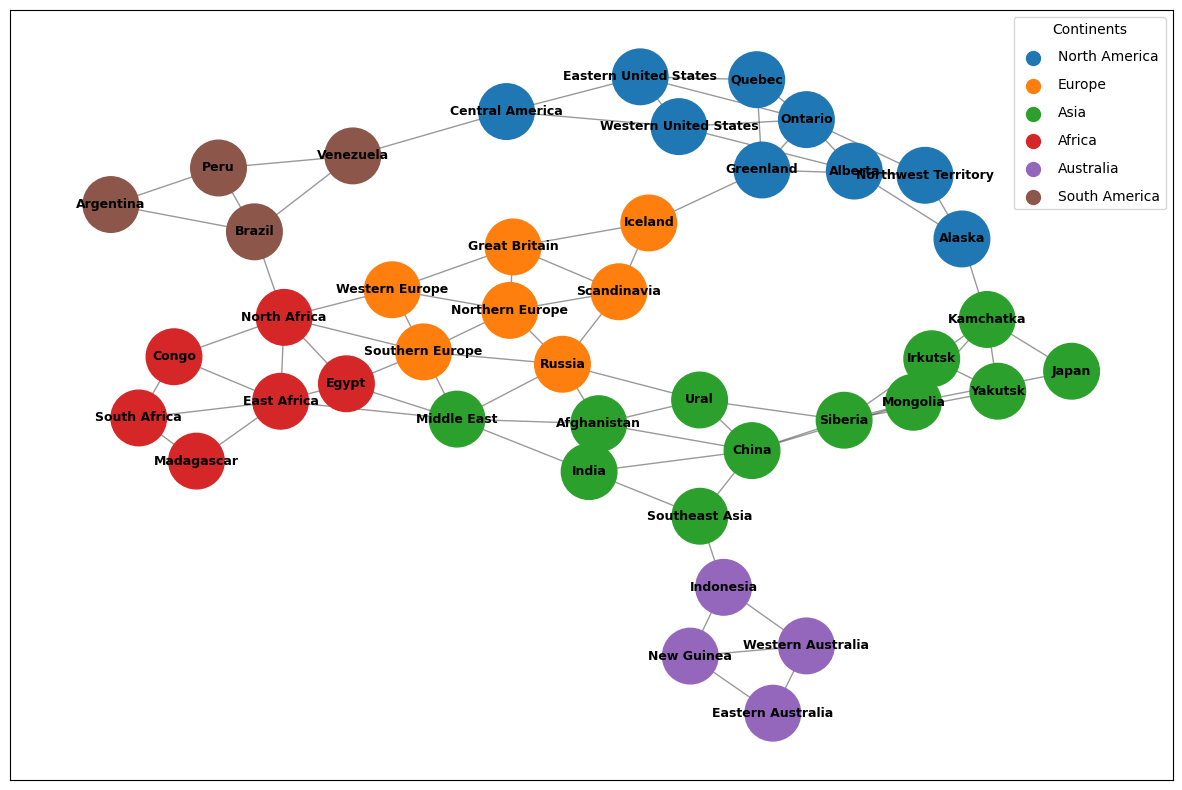

In [25]:
def visualize_risk_graph(G):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board
    """

    layout_type = 'kamada_kawai'
    
    layout_options = {
        'spring': nx.spring_layout,
        'circular': nx.circular_layout,
        'kamada_kawai': nx.kamada_kawai_layout,
        'shell': nx.shell_layout,
        'spectral': nx.spectral_layout
    }

    layout_func = layout_options.get(layout_type, nx.spring_layout)
    
    pos = layout_func(G)

    continents = list(set(nx.get_node_attributes(G, 'continent').values()))

   
    cmap = plt.get_cmap('tab10')
    continent_color_map = {continent: cmap(i % 10) for i, continent in enumerate(continents)}

    
    node_colors = [continent_color_map[G.nodes[node]['continent']] for node in G.nodes]

   
    plt.figure(figsize=(15, 10))

 
    nx.draw_networkx_edges(G, pos, alpha=0.4)

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1600)

    nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

    for continent in continents:
        plt.scatter([], [], c=[continent_color_map[continent]], label=continent, s=100)

    plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Continents')
        
visualize_risk_graph(G)


&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

1. The layout type that best provides visualization of the cluster board is `kamada_kawai` you get a clear view of the paths and their respective connections the spring is similar but its more cluttered making the connections harder to view

2. Based on a few different sources I can put together that the Kamada-Kawai layout is an algorithm that positions nodes in a graph based on a physical model, trying to minimize the distance between respective nodes. Im guessing the algorith tries to minimize distance so the displayed version is a good visual?

3. This block of code in the node_colors variable which the node are representing the continent: `node_colors = [continent_color_map[G.nodes[node]['continent']] for node in G.nodes]`

4. The legend was created using a for loop to in order to acess each continent alone and map that continent to its respective color to show on the legend

5. I used the cmap function along with the continent dictionary to map colors from the "tab10" parameter from the cmap function, this function was importated using matplotlib

6. used the draw_networkx_labels method along with G parameter and pos to set the node size and font size, there was a draw_networkx_labels for node size and a seperate one for draw_networkx_labels

7. From question number 6 i used the same network function to print the lables and node for the network `nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')`


Sources:

https://networkx.org/documentation/stable/_modules/networkx/drawing/layout.html#kamada_kawai_layout
https://cs.brown.edu/people/rtamassi/gdhandbook/chapters/force-directed.pdf
https://matplotlib.org/stable/users/explain/colors/colormaps.html

---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [27]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University